In [1]:
import pandas as pd
import matplotlib.pyplot as plt

#### Dataset of historical AT&T and Verizon stock prices

In [2]:
# Loading data from csv and convert to timeseries
df = pd.read_csv("../data/csv/stock_prices.csv", parse_dates = ['timestamp'], index_col = 'timestamp')

In [3]:
df.head()

,T,VZ
timestamp,,
2019-01-02,29.54,56.02
2019-01-03,29.58,56.22
2019-01-04,30.34,56.36
2019-01-07,30.89,56.72
2019-01-08,31.28,58.38


#### Data Analysis steps:
- Visualize time series data of the two stocks
- Compare how the stocks perform relative to each other by applying normalization

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 505 entries, 2019-01-02 to 2020-12-31
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   T       505 non-null    float64
 1   VZ      505 non-null    float64
dtypes: float64(2)
memory usage: 11.8 KB


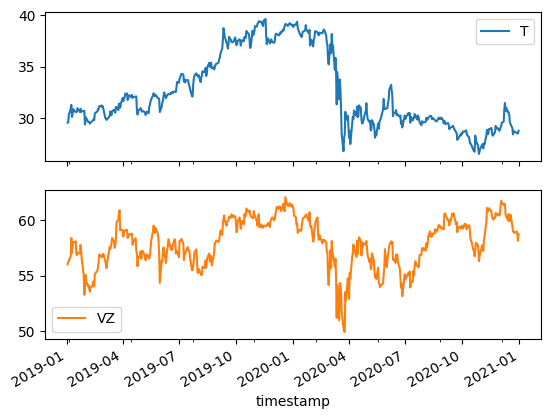

In [5]:
df.plot(subplots=True);

In [6]:
# Normalizing data to visualize how the stocks perform relative to each other
normalized = df.div(df.iloc[0]).mul(100)

In [7]:
normalized.head(3)

,T,VZ
timestamp,,
2019-01-02,100.000000,100.000000
2019-01-03,100.135410,100.357015
2019-01-04,102.708192,100.606926


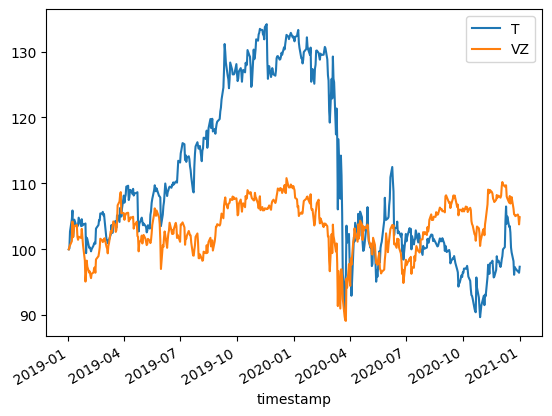

In [8]:
normalized.plot();